<a href="https://colab.research.google.com/github/Rhysus85/MA5851_MasterClass1/blob/main/Layer_3_QA_QC_Confirmation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#not required for decision tree
#!pip install image-quality
#import imquality.brisque as brisque


In [ ]:
#load libraries
#mount drive to access data 
import os 
from google.colab import drive
import pandas as pd
from PIL import Image, ImageStat
import numpy as np
import cv2 
from joblib import load


import matplotlib.pyplot as plt    # for plotting the images
import warnings
import seaborn as sns


#from joblib import dump, load

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#I used my drive for the POC
drive.mount('/content/drive',force_remount=True)
#set directory
os.chdir('/content/drive/MyDrive/Ocean_Infinity')
#os.listdir()

Mounted at /content/drive


##Function to split an image to get metadata information
blurscore_nn_var
blurscore_nn_mean
blurscore_nn_var | blurscore_grey
blurscore_nn_mean
mean
var_ch1


In [ ]:
#The decision tree creation is at the bottom of this script
clf = load('QA_QC_DecisionTree.joblib')

In [ ]:
raw_image_path = os.getcwd()+'/15_sec_cleaned/test/'

In [ ]:
image_metadata_row = pd.DataFrame()     
image_metadata = pd.DataFrame()
predict_features = pd.DataFrame()
masilloter_cnt = 0

for path, subdirs, files in os.walk(raw_image_path): 
      label= path.rsplit('/', 1)[1]
      image_cnt = 0 
      for name in files:
        #this is a list of images
        image_cnt +=1
        master_cnt +=1 
        image_dataset_path = raw_image_path+label 
        img = (image_dataset_path+'/'+name)
        image_name = name
        image_path = img
        
        #try:
        im = Image.open(img)
        stat = ImageStat.Stat(im)         
        var_ch1 = stat.var[0]
        median_ch1 = stat.median[0]
        mean_ch1 = stat.mean[0]
        stddev_ch1 = stat.stddev[0]
        rms_ch1 = stat.rms[0]
      
        img_colour = np.asarray(im)
        mean = img_colour.mean()
        img_grey = cv2.cvtColor(img_colour, cv2.COLOR_BGR2GRAY)
        median = np.median(img_grey)
        contrast = img_grey.std()
        blurscore_grey = cv2.Laplacian(img_grey, cv2.CV_64F).var()        
    
        blurscore_2 = cv2.Laplacian(img_grey, -1, ksize=5, scale=1, delta=0,borderType=cv2.BORDER_DEFAULT)
        blurscore_2_var = np.var(blurscore_2)
        blurscore_2_mean = np.mean(blurscore_2)
    
    #create a new images with no noise and then apply laplacian
        img_nn = cv2.GaussianBlur(img_grey,(13,13),0)
        blurscore_3 = cv2.Laplacian(img_nn, -1, ksize=5, scale=1, delta=0,borderType=cv2.BORDER_DEFAULT)
        blurscore_nn_var = np.var(blurscore_3)
        blurscore_nn_mean = np.mean(blurscore_3)   

        #This slows down the process by about 20seconds
        #putting dummy value in here as DecT model works well with this list
        #even though it doesnt use it.
        #bs_grey = brisque.score(img_grey)
        bs_grey = 1
    #Predict using decision tree
        predict_features = [var_ch1
                          ,median_ch1
                          ,mean_ch1
                          ,stddev_ch1
                          ,rms_ch1
                          ,contrast                
                          ,mean
                          ,median
                          ,bs_grey
                          ,blurscore_grey
                          ,blurscore_2_var
                          ,blurscore_2_mean
                          ,blurscore_nn_var
                          ,blurscore_nn_mean                               
                          ]               
        predict_features_row = pd.DataFrame(predict_features).T  
        predict_features_row.columns=['var_ch1'
                                     ,'median_ch1'
                                     ,'mean_ch1'
                                     ,'stddev_ch1'
                                     ,'rms_ch1'
                                     ,'contrast'
                                     ,'mean'
                                     ,'median'
                                     ,'bs_grey'
                                     ,'blurScore_grey'
                                     ,'blurscore_2_var'
                                     ,'blurscore_2_mean'
                                     ,'blurscore_nn_var'
                                     ,'blurscore_nn_mean'                             
                                ]   
        Visibility_class = clf.predict(predict_features_row)
        #print(Visibility_class)
        Visibility_class = pd.DataFrame(Visibility_class)
        image_metadata_raw = [image_name
                              ,image_path
                              ,label
                              ,var_ch1
                              ,median_ch1
                              ,mean_ch1
                              ,stddev_ch1
                              ,rms_ch1
                              ,contrast                
                              ,mean
                              ,median
                              ,bs_grey
                              ,blurscore_grey
                              ,blurscore_2_var
                              ,blurscore_2_mean
                              ,blurscore_nn_var
                              ,blurscore_nn_mean
                              ,Visibility_class
                              ]
        image_metadata_row = pd.DataFrame(image_metadata_raw).T       
        image_metadata = image_metadata.append(image_metadata_row)
        

        #except:
          #print("Image completely failed: "+image_name)
## # ### ############################## 


In [ ]:
image_metadata.columns=[image_name
                                ,'image_path'
                                ,'label'
                                ,'var_ch1'
                                ,'median_ch1'
                                ,'mean_ch1'
                                ,'stddev_ch1'
                                ,'rms_ch1'
                                ,'contrast'
                                ,'mean'
                                ,'median'
                                ,'bs_grey'
                                ,'blurScore_grey'
                                ,'blurscore_2_var'
                                ,'blurscore_2_mean'
                                ,'blurscore_nn_var'
                                ,'blurscore_nn_mean' 
                                ,'Visibility_class'                            
                                ]   

In [ ]:
image_metadata

,2_Good__orginal_frame_28125.jpg,image_path,label,var_ch1,median_ch1,mean_ch1,stddev_ch1,rms_ch1,contrast,mean,median,bs_grey,blurScore_grey,blurscore_2_var,blurscore_2_mean,blurscore_nn_var,blurscore_nn_mean,Visibility_class
0,1_Very_Good__orginal_frame_117750.jpg,/content/drive/MyDrive/Ocean_Infinity/15_sec_c...,Very Good,645.640161,87,89.999411,25.40945,93.51756,26.547961,92.428083,90.0,1,23.831921,4524.783892,39.409051,718.670165,15.714605,0 0 Very Good
0,1_Very_Good__orginal_frame_110625.jpg,/content/drive/MyDrive/Ocean_Infinity/15_sec_c...,Very Good,1929.308328,67,77.567965,43.923892,89.140886,40.053915,77.148367,67.0,1,23.283727,2855.734503,29.334634,412.783707,11.41987,0 0 Very Good
0,1_Very_Good__orginal_frame_118875.jpg,/content/drive/MyDrive/Ocean_Infinity/15_sec_c...,Very Good,572.214036,87,89.439003,23.920996,92.582662,24.886419,91.751204,89.0,1,19.346652,3781.277252,35.857416,586.432463,14.377378,0 0 Very Good
0,5_Very_Poor__orginal_frame_21375.jpg,/content/drive/MyDrive/Ocean_Infinity/15_sec_c...,Very Poor,1111.407861,68,71.83238,33.337784,79.191531,35.58536,70.841104,65.0,1,11.983161,1061.301303,18.795345,58.126316,4.825224,0 0 Very Poor
0,5_Very_Poor__orginal_frame_1500.jpg,/content/drive/MyDrive/Ocean_Infinity/15_sec_c...,Very Poor,434.408717,62,59.442908,20.842474,62.991016,21.180534,58.792703,59.0,1,27.422322,1218.662766,20.143204,60.563602,4.829155,0 0 Very Poor
0,5_Very_Poor__orginal_frame_2250.jpg,/content/drive/MyDrive/Ocean_Infinity/15_sec_c...,Very Poor,566.884746,53,55.786602,23.809342,60.655006,24.960951,54.929151,50.0,1,24.44415,1135.707374,19.60274,61.128316,4.897687,0 0 Very Poor
0,4_Poor__orginal_frame_70875.jpg,/content/drive/MyDrive/Ocean_Infinity/15_sec_c...,Poor,216.246937,69,67.7358,14.705337,69.313675,15.120396,68.309674,71.0,1,9.070842,326.27235,8.765218,49.787166,3.709656,0 0 Poor
0,4_Poor__orginal_frame_73125.jpg,/content/drive/MyDrive/Ocean_Infinity/15_sec_c...,Poor,238.883767,72,71.502062,15.455865,73.15346,15.765322,72.109818,72.0,1,9.658092,323.574916,9.080428,53.433787,4.09759,0 0 Very Poor
0,3_Moderate__orginal_frame_98250.jpg,/content/drive/MyDrive/Ocean_Infinity/15_sec_c...,Moderate,253.395868,75,74.094135,15.918413,75.784805,15.844439,74.781558,76.0,1,9.868952,292.636343,9.06653,55.396003,4.40414,0 0 Moderate
0,3_Moderate__orginal_frame_76125.jpg,/content/drive/MyDrive/Ocean_Infinity/15_sec_c...,Moderate,1046.924756,56,54.85421,32.356217,63.68602,31.106152,55.023981,57.0,1,12.311932,423.035065,11.152461,59.642056,4.748831,0 0 Good


In [ ]:
#create the image metadata file
filename = 'Layer 3 - Decision Tree.csv'

if os.path.exists(filename):
  image_metadata.to_csv(filename, mode='a', index=False, header=False)
  print("Metadata extract added to existing file.")
else:
  image_metadata.to_csv(filename, mode='a', index=False, header=True)
  print("Metadata extract created new file.")

Metadata extract added to existing file.


##Laplacian (blur score) extended

###Load csv files and merge

In [ ]:
full_md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   image_name         191 non-null    object  
 1   image_path         191 non-null    object  
 2   label_x            191 non-null    object  
 3   var_ch1            191 non-null    float64 
 4   var_ch2            191 non-null    float64 
 5   var_ch3            191 non-null    float64 
 6   median_ch1         191 non-null    int64   
 7   median_ch2         191 non-null    int64   
 8   median_ch3         191 non-null    int64   
 9   mean_ch1           191 non-null    float64 
 10  mean_ch2           191 non-null    float64 
 11  mean_ch3           191 non-null    float64 
 12  stddev_ch1         191 non-null    float64 
 13  stddev_ch2         191 non-null    float64 
 14  stddev_ch3         191 non-null    float64 
 15  rms_ch1            191 non-null    float64 
 16  rms_ch2 

###laplacian playaround

In [ ]:
sns.boxplot(x='label', y='bs_colour', data=full_md)
(full_md['blurScore_colour'].hist(by=full_md['label']))


In [ ]:
sns.boxplot(x='label', y='bs_grey', data=full_md)
(full_md['blurScore_colour'].hist(by=full_md['label']))




In [ ]:
sns.boxplot(x='label', y='blurScore_colour', data=full_md)
(full_md['blurScore_colour'].hist(by=full_md['label']))


In [ ]:
sns.boxplot(x='label', y='blurScore_grey', data=full_md)
(full_md['blurScore_grey'].hist(by=full_md['label']))

###laplacian 2nd order derivative

In [ ]:
raw_image_path = '/content/drive/MyDrive/Ocean_Infinity/Dataset_Original/'

In [ ]:
#show original images in a grid
image_metadata_row = pd.DataFrame()     
image_metadata = pd.DataFrame()

for path, subdirs, files in os.walk(raw_image_path): 
  label= path.rsplit('/', 1)[1]
  for image in files:
    image_dataset_path = raw_image_path+label+'/'+image   
    try:
      img = Image.open(image_dataset_path)
      #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img_colour = np.asarray(img)
      img_grey = cv2.cvtColor(img_colour, cv2.COLOR_BGR2GRAY)

      blurscore_2 = cv2.Laplacian(img_grey, -1, ksize=5, scale=1, delta=0,borderType=cv2.BORDER_DEFAULT)
      blurscore_2_var = np.var(blurscore_2)
      blurscore_2_mean = np.mean(blurscore_2)

      #create a new images with no noise and then apply laplacian
      img_nn = cv2.GaussianBlur(img_grey,(13,13),0)
      blurscore_3 = cv2.Laplacian(img_nn, -1, ksize=5, scale=1, delta=0,borderType=cv2.BORDER_DEFAULT)
      blurscore_nn_var = np.var(blurscore_3)
      blurscore_nn_mean = np.mean(blurscore_3)

    except:
      continue

    image_metadata_raw = [image,
                          label,
                          blurscore_2_var,
                          blurscore_2_mean,
                          blurscore_nn_var,
                          blurscore_nn_mean
                      ]
    image_metadata_row = pd.DataFrame(image_metadata_raw).T       
    image_metadata = image_metadata.append(image_metadata_row)

image_metadata.columns=['image',
                      'label',
                      'blurscore_2_var',  
                      'blurscore_2_mean',
                      'blurscore_nn_var',  
                      'blurscore_nn_mean'
                  ]


In [ ]:
#create the image metadata file
filename = 'image_blurscore_2.csv'

if os.path.exists(filename):
  image_metadata.to_csv(filename, mode='a', index=False, header=False)
  print("Metadata extract added to existing file.")
else:
  image_metadata.to_csv(filename, mode='a', index=False, header=True)
  print("Metadata extract created new file.")

Metadata extract created new file.


In [ ]:
#load csv from contrast_metadata csv file
filename_1 = 'image_contrast_metadata.csv'
filename_2 = 'image_metadata_stats.csv'
filename_3 = 'image_blurscore_2.csv'

image_metadata = pd.read_csv(os.getcwd()+'/'+filename_1,index_col=False)
image_metadata_stats = pd.read_csv(os.getcwd()+'/'+filename_2,index_col=False)
image_blurscore_2 = pd.read_csv(os.getcwd()+'/'+filename_3,index_col=False)

full_md = pd.merge(image_metadata_stats,image_metadata,left_on='image_name',right_on='image')
full_md = pd.merge(full_md,image_blurscore_2,left_on='image',right_on='image')

full_md['label'] = full_md['label_x'].astype('category')

In [ ]:
sns.boxplot(x='label', y='blurscore_2_var', data=full_md)
(full_md['blurScore_grey'].hist(by=full_md['label']))

In [ ]:
sns.boxplot(x='label', y='blurscore_2_mean', data=full_md)
(full_md['blurScore_grey'].hist(by=full_md['label']))

In [ ]:
sns.boxplot(x='label', y='blurscore_nn_var', data=full_md)
(full_md['blurscore_nn_var'].hist(by=full_md['label']))

In [ ]:
sns.boxplot(x='label', y='blurscore_nn_mean', data=full_md)
(full_md['blurscore_nn_mean'].hist(by=full_md['label']))

##Try with just looking at mod, poor and very poor

In [ ]:
#remove good and very good
m_p_vp = full_md[ (full_md['label'] == '3_Moderate') | (full_md['label'] == '4_Poor') | (full_md['label'] == '5_Very_Poor')]


In [ ]:
sns.boxplot(x='label', y='blurscore_nn_mean', data=m_p_vp)

In [ ]:
sns.boxplot(x='label', y='blurscore_nn_var', data=m_p_vp)

#DECISION TREE CLASSIFIER

In [ ]:
#load csv from contrast_metadata csv file
filename_1 = 'image_contrast_metadata.csv'
filename_2 = 'image_metadata_stats.csv'
filename_3 = 'image_blurscore_2.csv'

image_metadata = pd.read_csv(os.getcwd()+'/'+filename_1,index_col=False)
image_metadata_stats = pd.read_csv(os.getcwd()+'/'+filename_2,index_col=False)
image_blurscore_2 = pd.read_csv(os.getcwd()+'/'+filename_3,index_col=False)

full_md = pd.merge(image_metadata_stats,image_metadata,left_on='image_name',right_on='image')
full_md = pd.merge(full_md,image_blurscore_2,left_on='image',right_on='image')

full_md['label'] = full_md['label_x'].astype('category')

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [ ]:
y = full_md.label
X = full_md.drop(['label','label_x','image_path','image_name','image','label_y'],axis=1)
X_2 = full_md.drop(['label','label_x','image_path','image_name','image','label_y','min','max'
                    ,'var_ch2','var_ch3','median_ch2','median_ch3','mean_ch2','mean_ch3','stddev_ch2','stddev_ch3'
                    ,'rms_ch2','rms_ch3','bs_colour','blurScore_colour'],axis=1)

In [ ]:
feature_cols = ['var_ch1','var_ch2','var_ch3','median_ch1','median_ch2','median_ch3','mean_ch1','mean_ch2','mean_ch3','stddev_ch1','stddev_ch2','stddev_ch3','rms_ch1','rms_ch2','rms_ch3','contrast','min','max','mean','median','bs_colour','bs_grey','blurScore_colour','blurScore_grey','blurscore_2_var','blurscore_2_mean','blurscore_nn_var','blurscore_nn_mean']
feature_cols_2 = ['var_ch1','var_ch2','var_ch3','median_ch1','median_ch2','median_ch3','mean_ch1','mean_ch2','mean_ch3','stddev_ch1','stddev_ch2','stddev_ch3','rms_ch1','rms_ch2','rms_ch3','contrast','mean','median','bs_colour','bs_grey','blurScore_colour','blurScore_grey','blurscore_2_var','blurscore_2_mean','blurscore_nn_var','blurscore_nn_mean']

feature_cols_3 = ['var_ch1','median_ch1','mean_ch1','stddev_ch1','rms_ch1','contrast','mean','median','bs_grey','blurScore_grey','blurscore_2_var','blurscore_2_mean','blurscore_nn_var','blurscore_nn_mean']



blurscore_nn_var
blurscore_nn_mean
blurscore_nn_var | blurscore_grey
blurscore_nn_mean
mean
var_ch1


In [ ]:
X_2

,var_ch1,median_ch1,mean_ch1,stddev_ch1,rms_ch1,contrast,mean,median,bs_grey,blurScore_grey,blurscore_2_var,blurscore_2_mean,blurscore_nn_var,blurscore_nn_mean
0,2029.071266,67,78.388944,45.045214,90.409612,41.494532,78.307094,67,102.380152,25.457150,3349.104051,32.412752,494.630172,12.568113
1,1844.410627,69,78.623372,42.946602,89.588198,38.887777,77.812484,69,102.290689,21.603580,2506.004710,27.009382,377.375435,10.769596
2,710.368796,88,91.675876,26.652745,95.471645,27.391472,93.817316,91,114.867984,20.169169,3949.231388,36.584929,624.744704,14.810173
3,688.986988,90,92.249366,26.248562,95.911065,26.860259,95.354690,94,125.673951,19.767302,3803.012354,35.641086,601.825655,14.474949
4,2044.712996,54,64.351150,45.218503,78.649752,43.323930,65.520945,56,139.062580,36.030809,6043.822550,47.476054,1156.108307,19.007409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,184.263477,70,68.205157,13.574368,69.542843,14.068205,68.935853,71,117.518848,9.135605,327.936305,8.923839,50.860253,3.819983
187,211.955780,64,63.738117,14.558701,65.379686,14.702856,64.402434,65,117.147463,11.283361,415.624683,10.153251,53.073020,4.012848
188,649.866175,60,56.370881,25.492473,61.867135,25.067810,55.862638,58,103.204275,9.568128,176.304930,7.174636,49.159870,3.983225
189,192.595796,65,63.668319,13.877889,65.163261,14.242629,64.241275,66,117.884586,9.685109,338.456435,9.057843,51.201991,3.803288


In [ ]:
X_2.info()

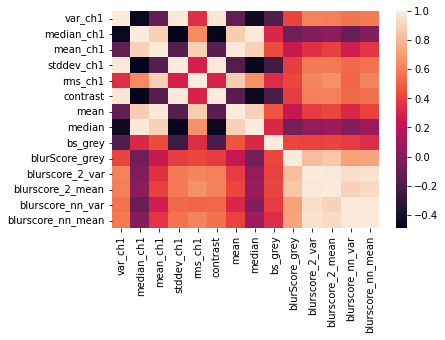

In [ ]:
# Calculating the correlation matrix
corr = X_2.corr()
# Generating a heatmap
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=1)

In [ ]:
#scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#SAVE THE MODEL 
from joblib import dump, load
dump(clf, 'QA_QC_DecisionTree.joblib')
clf = load('QA_QC_DecisionTree.joblib')

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8974358974358975


In [ ]:
#!pip install graphviz
#!pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

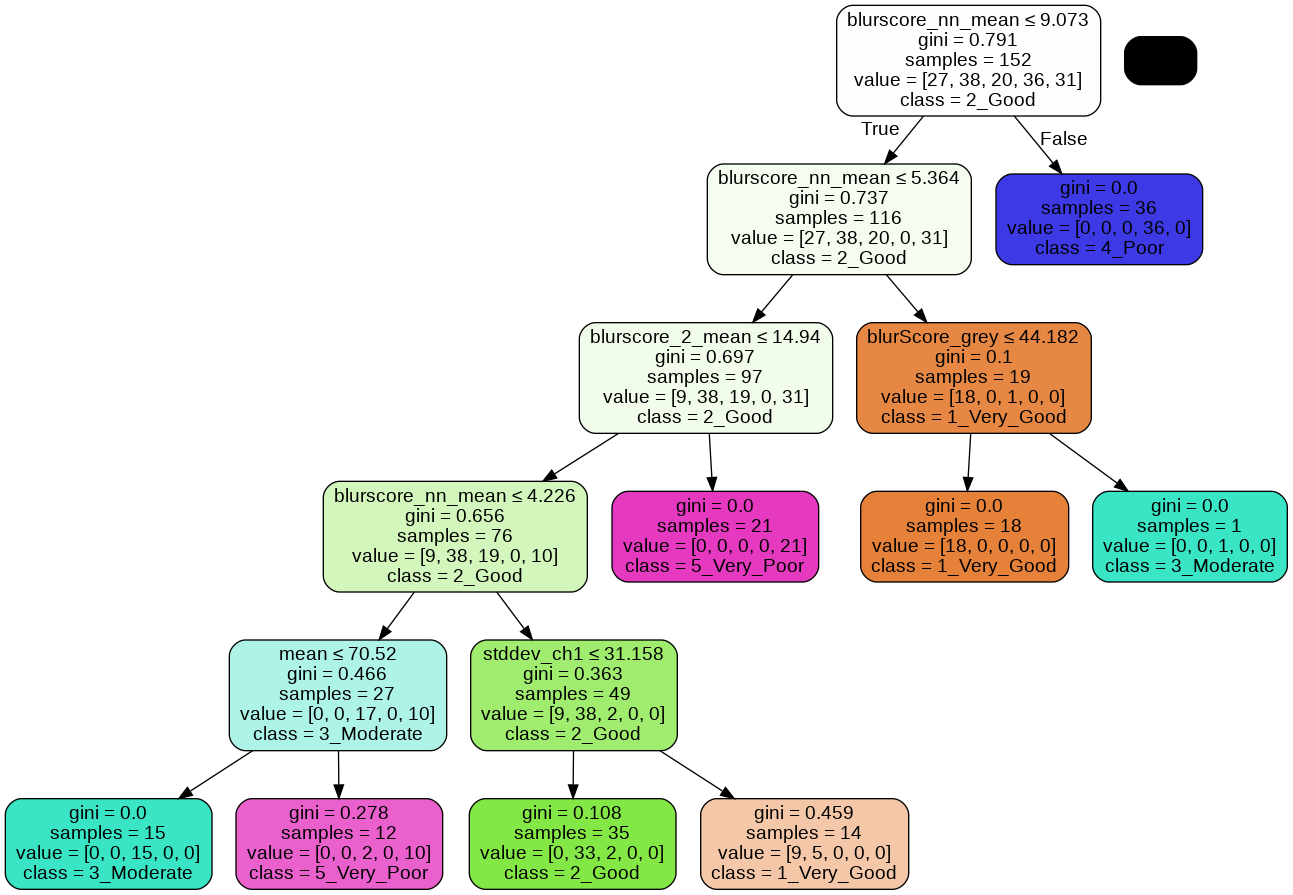

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols_3,class_names=['1_Very_Good'
                                                                                 ,'2_Good'
                                                                                 ,'3_Moderate'
                                                                                 ,'4_Poor'
                                                                                 ,'5_Very_Poor'
                                                                                 ])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())

blurscore_nn_var
blurscore_nn_mean
blurscore_nn_var | blurscore_greymean
var_ch1



###CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, py_pred)
accuracy = sum(cm[i][i] for i in range(3)) / y_test.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.4358974358974359


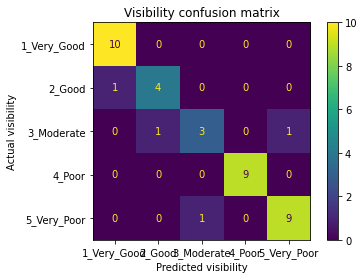

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['1_Very_Good'
                                                                                 ,'2_Good'
                                                                                 ,'3_Moderate'
                                                                                 ,'4_Poor'
                                                                                 ,'5_Very_Poor'
                                                                                 ])

cmd_obj.plot()

## Use the Axes attribute 'ax_' to get to the underlying Axes object.
cmd_obj.ax_.set(

                title='Visibility confusion matrix',
                xlabel='Predicted visibility',
                ylabel='Actual visibility')
plt.show()

## BEST PARAMETER SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_param = {
'criterion': ['gini', 'entropy'],
'max_depth' : range(2,32,1),
'min_samples_leaf' : range(1,10,1),
'min_samples_split': range(2,10,1),
'splitter' : ['best', 'random']
}

In [ ]:
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)
#{'criterion': 'entropy', 'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}

{'criterion': 'gini', 'max_depth': 29, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}


In [ ]:
grid_search.best_score_

0.9277419354838712

In [ ]:
clf_bp = DecisionTreeClassifier(criterion = 'entropy'
                            ,max_depth =29
                            , min_samples_leaf= 1
                            , min_samples_split= 3
                            , splitter ='random')
clf_bp.fit(X_train,y_train)





DecisionTreeClassifier(criterion='entropy', max_depth=29, min_samples_split=3,
                       splitter='random')

In [ ]:
clf_bp.score(X_test,y_test)

0.8974358974358975

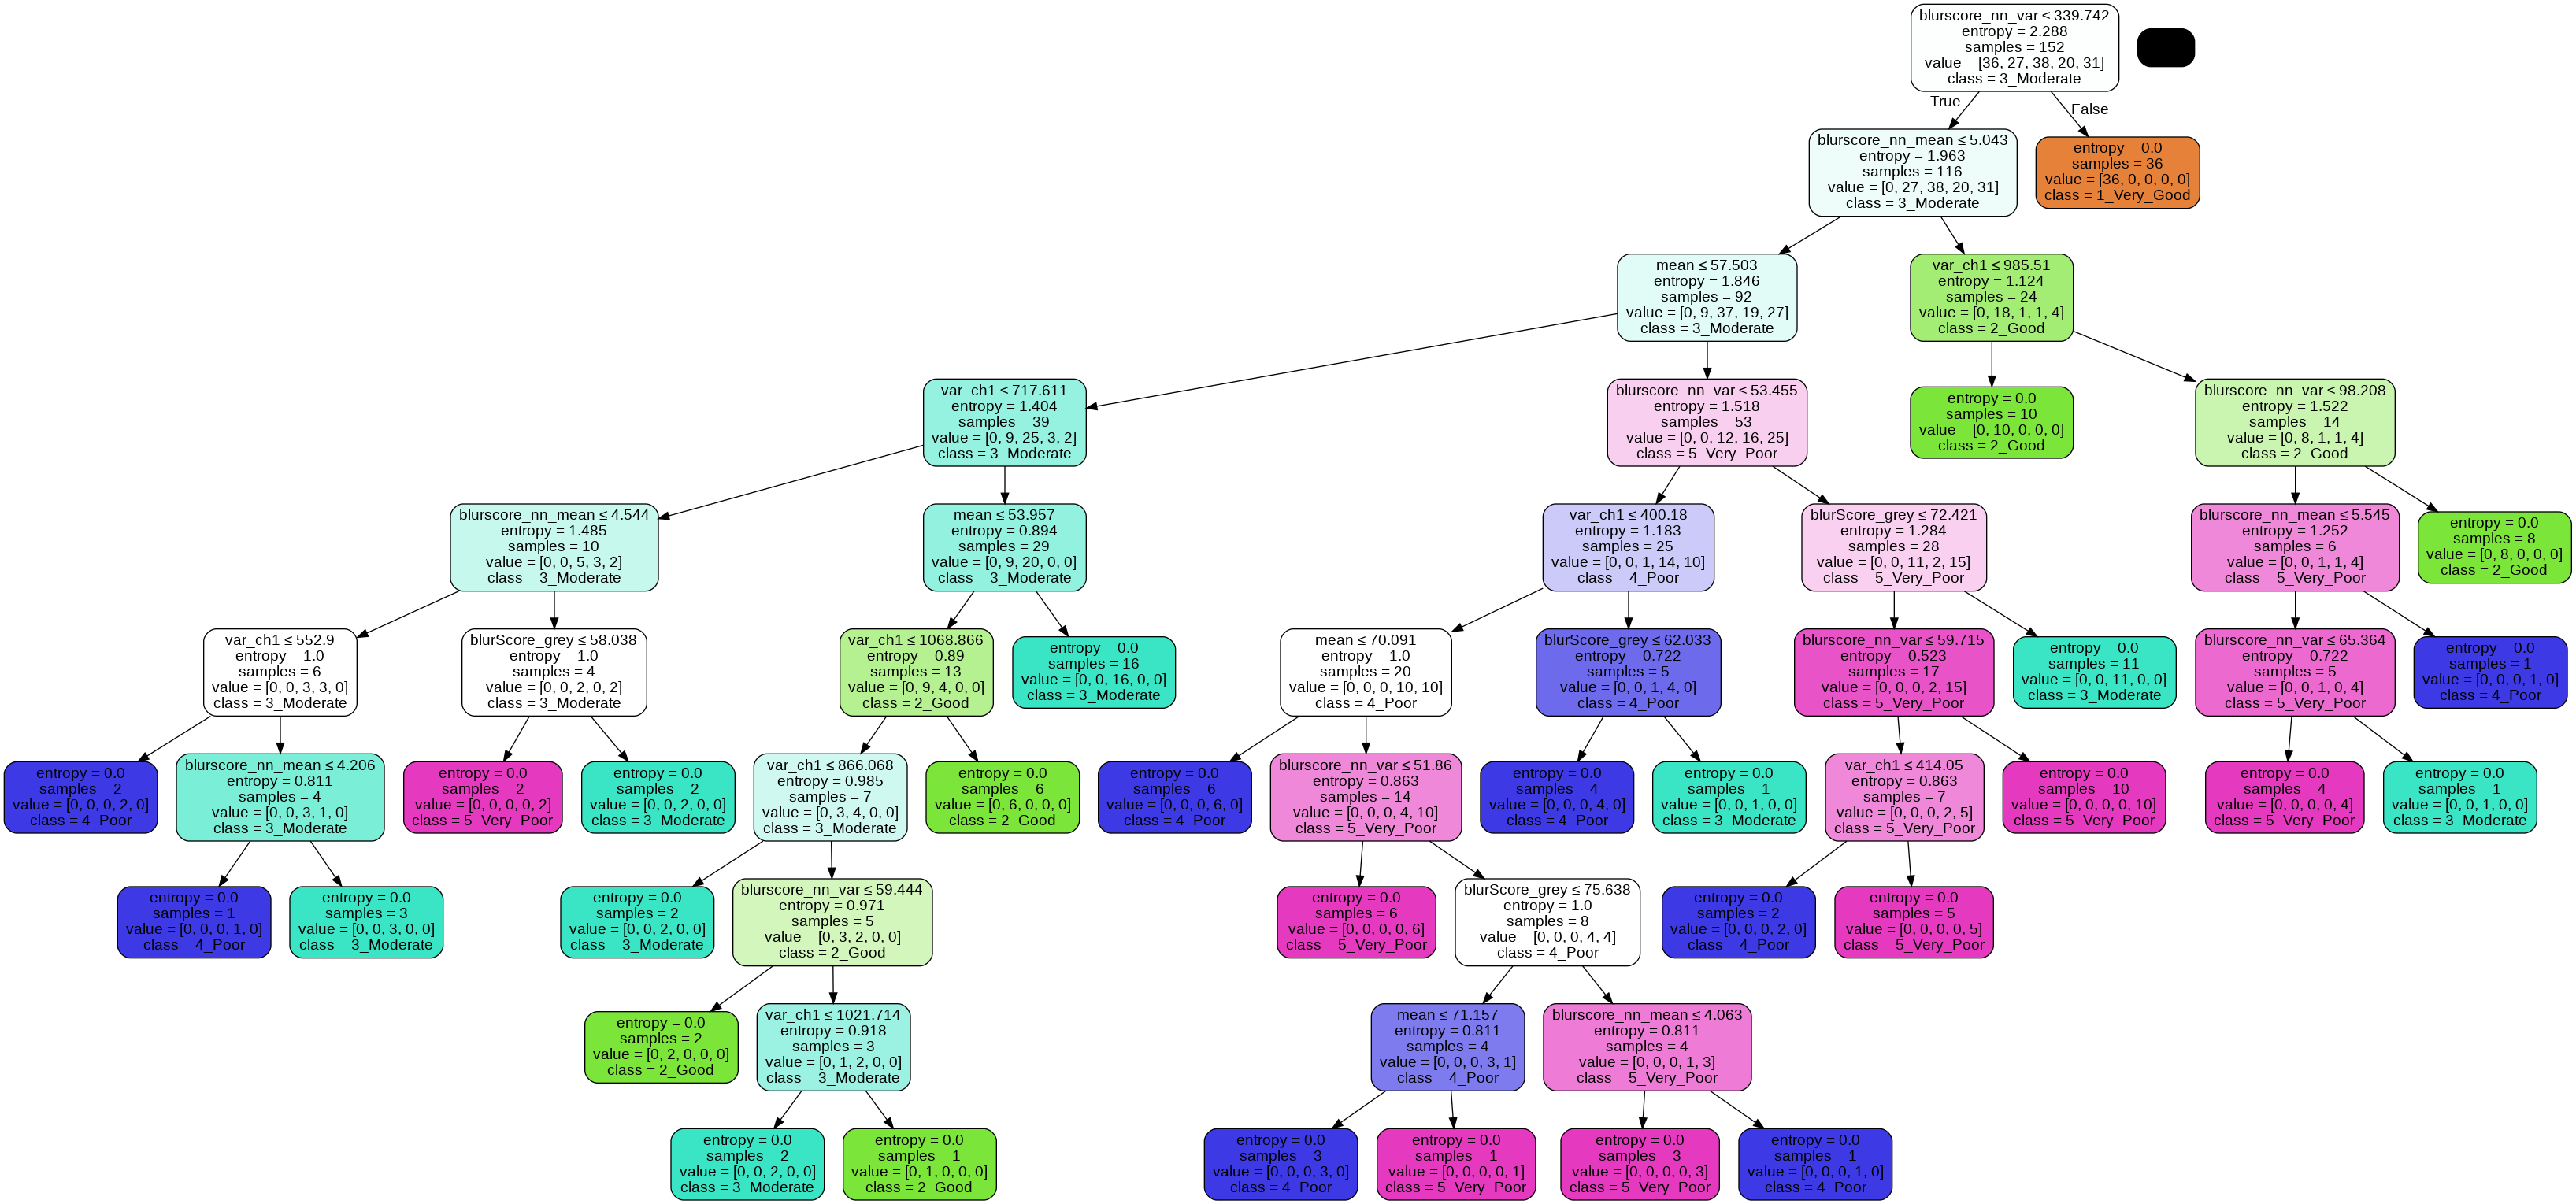

In [ ]:
dot_data = StringIO()
export_graphviz(clf_bp, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols_3,class_names=['1_Very_Good'
                                                                                 ,'2_Good'
                                                                                 ,'3_Moderate'
                                                                                 ,'4_Poor'
                                                                                 ,'5_Very_Poor'
                                                                                 ])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
py_pred2 = clf.predict(X_test)

In [ ]:
py_pred

array(['1_Very_Good', '2_Good', '4_Poor', '3_Moderate', '2_Good',
       '5_Very_Poor', '1_Very_Good', '4_Poor', '4_Poor', '5_Very_Poor',
       '3_Moderate', '1_Very_Good', '2_Good', '3_Moderate', '4_Poor',
       '2_Good', '5_Very_Poor', '1_Very_Good', '1_Very_Good', '2_Good',
       '2_Good', '4_Poor', '3_Moderate', '3_Moderate', '1_Very_Good',
       '2_Good', '1_Very_Good', '5_Very_Poor', '5_Very_Poor', '2_Good',
       '1_Very_Good', '4_Poor', '4_Poor', '1_Very_Good', '2_Good',
       '5_Very_Poor', '4_Poor', '4_Poor', '2_Good'], dtype=object)

In [ ]:
py_pred2

array(['1_Very_Good', '2_Good', '5_Very_Poor', '2_Good', '2_Good',
       '5_Very_Poor', '1_Very_Good', '5_Very_Poor', '5_Very_Poor',
       '5_Very_Poor', '5_Very_Poor', '1_Very_Good', '2_Good',
       '3_Moderate', '4_Poor', '2_Good', '5_Very_Poor', '1_Very_Good',
       '1_Very_Good', '2_Good', '2_Good', '5_Very_Poor', '3_Moderate',
       '3_Moderate', '1_Very_Good', '2_Good', '1_Very_Good',
       '5_Very_Poor', '4_Poor', '2_Good', '1_Very_Good', '4_Poor',
       '3_Moderate', '1_Very_Good', '2_Good', '5_Very_Poor',
       '5_Very_Poor', '5_Very_Poor', '2_Good'], dtype=object)